# Preamble

In [ ]:
# preamble
base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_code/code_for_GitHub'


import numpy as np
import torch
import matplotlib.pyplot as plt
import random

from google.colab import drive

import shutil
import pickle
import os

import time

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


!pip install import-ipynb
import import_ipynb


from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)



if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight

if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')



shutil.copy ( base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/'  )    

import my_signal_processing


if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/FA_depends_on_neural_activity_auto_cross_corr'
base_directory_figure_str =  base_directory_str + '/figures/FA_depends_on_neural_activity_auto_cross_corr'

if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")


print(device)
plt.rcParams["mathtext.default"]= 'regular'


plt_fontsize_text_ = 9
plt_fontsize_title_ = 9
plt_fontsize_label_ = 7
plt_fontsize_legend_ = 9


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]

cm_to_inch = 1/2.54  # centimeters in inches
figure_width1 = 9*cm_to_inch
figure_width2 = 19*cm_to_inch






import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)


#   generate $\delta_2=L_0$ from N(0,1) at each iteration




In [ ]:

N_repeat = 10

N_epoch = 1500

N_input = 20
N_hidden = 100
N_output = 20
N_batch = 100


lr = .0004

def activation1(x):
  

  return torch.mul( x >= 0 , x  )

def derivative_activation1(x):

  return (x >= 0) * 1




angle_W1_B_list_random_E_equal_X = []


for j in range(N_repeat):

  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input]))


  angle_W1_B_list = []
  angle_dW1_B_list = []





  angle_dW0_bp_dW0_fa_list = []




  angle_dW1_W1_list = []





  norm_dw0_list = []
  angle_W0_change_list = []
  angle_E_change_list = []

  A =  torch.randn(  [  N_output,N_input ]  )

  W0_list= []
  for i in range(N_epoch):
    E = torch.randn( [N_batch , N_output] ) 
    X = E

    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )


    delta2 = E
    # delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 




  angle_W1_B_list_random_E_equal_X.append(angle_W1_B_list)



with open( base_directory_data_str + "/angle_W1_B_list_random_E_equal_X.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_list_random_E_equal_X  , fp)





#   generate $\delta_2$ and $L_0$ from N(0,1) at each iteration




In [ ]:

N_repeat = 10

N_epoch = 1500

N_input = 20
N_hidden = 100
N_output = 20
N_batch = 100


lr = .0004

# N_repeat = 30

def activation1(x):
  

  return torch.mul( x >= 0 , x  )

def derivative_activation1(x):

  return (x >= 0) * 1




angle_W1_B_list_random_E_and_X = []


for j in range(N_repeat):

  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input]))


  angle_W1_B_list = []
  angle_dW1_B_list = []





  angle_dW0_bp_dW0_fa_list = []




  angle_dW1_W1_list = []





  norm_dw0_list = []
  angle_W0_change_list = []
  angle_E_change_list = []

  A =  torch.randn(  [  N_output,N_input ]  )

  W0_list= []
  for i in range(N_epoch):
    E = torch.randn( [N_batch , N_output] ) 
    X = torch.randn( [N_batch , N_input] ) 

    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )


    delta2 = E
    # delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 




  angle_W1_B_list_random_E_and_X.append(angle_W1_B_list)



with open( base_directory_data_str + "/angle_W1_B_list_random_E_and_X.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_list_random_E_and_X  , fp)






# Constnt $\delta_2$ and $L_0$

In [ ]:

N_repeat = 10

N_epoch = 1500

N_input = 20
N_hidden = 100
N_output = 20
N_batch = 100


lr = .0004


angle_W1_B_fixed_E = []
angle_dW0_bp_dW0_fa_list_fixed_E = []

for j in range(N_repeat):
    
  W0 = (torch.randn([N_input , N_hidden]))
  W1 = (torch.randn([N_hidden , N_output]))
  B = (torch.randn([N_output , N_hidden]))
  X = (torch.randn([N_batch , N_input]))






  angle_W1_B_list = []
  angle_dW1_B_list = []




  angle_dW0_bp_dW0_fa_list = []



  angle_dW1_W1_list = []




  norm_dw0_list = []
  angle_W0_change_list = []
  angle_E_change_list = []

  W0_list= []
  E = torch.randn( [N_batch , N_output] )


  for i in range(N_epoch):
  

    Z1 = torch.matmul(   X ,  W0  )
    L1 = activation1( Z1 )
    Z2 = torch.matmul(   L1 ,  W1  )
    L2 = activation1(  Z2   )

    delta2 = E


    # delta2 = torch.mul( E , derivative_activation1( Z2 )  ) 
    dw1 = lr* torch.matmul (  L1.t()  ,  delta2  )



    delta1 = torch.matmul (  delta2  ,  B  )
    delta1 = torch.mul (  delta1  ,  derivative_activation1(Z1)   )


    dw0 = lr* torch.matmul (     X.t()   ,    delta1  )

    
    W0 = W0 + dw0
    W1 = W1 + dw1


    delta1_bp = torch.matmul (  delta2  ,  W1.t()  )
    delta1_bp = torch.mul (  delta1_bp  ,  derivative_activation1(Z1)   )


    dw0_bp = lr* torch.matmul (     X.t()   ,    delta1_bp  )

    angle_dW0_bp_dW0_fa_list.append( my_weight.angle(dw0_bp ,dw0 )  )



    angle_W1_B_list.append(   my_weight.angle(  W1  ,  B.t()   )   )
    angle_dW1_B_list.append(   my_weight.angle(  dw1  ,  B.t()   )   )
    angle_dW1_W1_list.append(   my_weight.angle(  dw1  ,  W1   )   ) 


  angle_W1_B_fixed_E.append( angle_W1_B_list  )



with open(  base_directory_data_str +  "/angle_W1_B_fixed_E.txt"  , "wb") as fp:   #Pickling
  pickle.dump( angle_W1_B_fixed_E  , fp)





# Plot

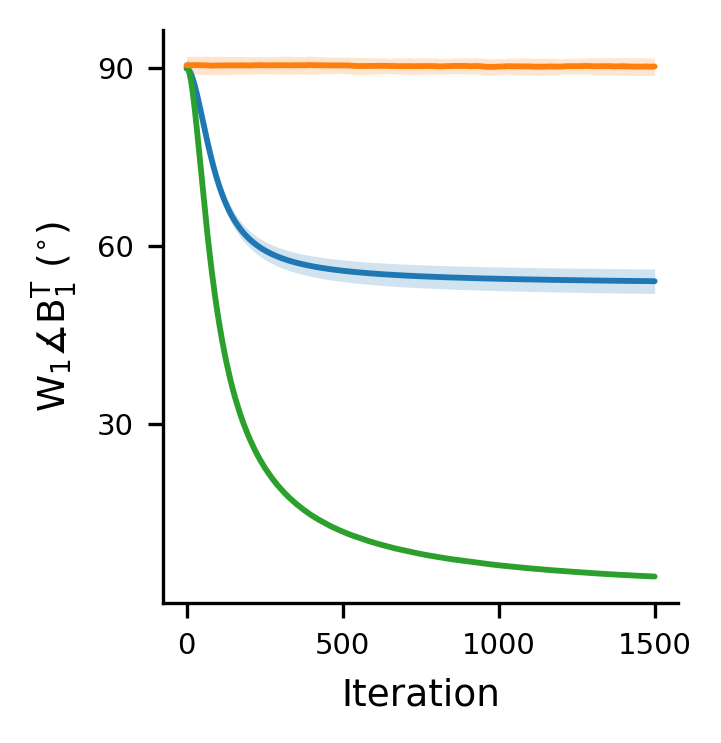

In [ ]:


with open(  base_directory_data_str +  "/angle_W1_B_list_random_E_equal_X.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_random_E_equal_X = pickle.load(fp)

  

with open(   base_directory_data_str +  "/angle_W1_B_list_random_E_and_X.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_list_random_E_and_X = pickle.load(fp)

  

with open(  base_directory_data_str +  "/angle_W1_B_fixed_E.txt"   , "rb") as fp:   #Pickling
  angle_W1_B_fixed_E = pickle.load(fp)


linewidth_ = 1.4

line_style_ = (0,(4,1))
line_style_2 = (0,(0.01,2))

line_style_ = '-'



N_epoch=1500

plt.figure(num = None, figsize=(figure_width1/1.6,figure_width1/1.4) , dpi=300, facecolor='w', edgecolor='k')

x = torch.tensor(angle_W1_B_fixed_E)[:,0:1500]

non_nan_rows = torch.isnan(x).sum(dim = 1) == 0 
x = x[non_nan_rows , :]
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = line_style_  , solid_capstyle='round', label = r"$Fixed\ E$" , color = my_cycle[0] , linewidth=linewidth_  )   
x_std = x.std(dim=0) 
plt.fill_between( range(N_epoch)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[0] , alpha=0.2 , linewidth=0)  



x = torch.tensor(angle_W1_B_list_random_E_equal_X)[:,0:1500]
non_nan_rows = torch.isnan(x).sum(dim = 1) == 0 
x = x[non_nan_rows , :]
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = line_style_  , solid_capstyle='round', label = r"$Fixed\ E$" , color = my_cycle[2] , linewidth=linewidth_  )   
x_std = x.std(dim=0) 
plt.fill_between( range(N_epoch)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[2] , alpha=0.2 , linewidth=0)  




x = torch.tensor(angle_W1_B_list_random_E_and_X)[:,0:1500]

non_nan_rows = torch.isnan(x).sum(dim = 1) == 0 
x = x[non_nan_rows , :]
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , linestyle = line_style_  , solid_capstyle='round', label = r"$Fixed\ E$" , color = my_cycle[1] , linewidth=linewidth_  )   
x_std = x.std(dim=0) 
plt.fill_between( range(N_epoch)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[1] , alpha=0.2 , linewidth=0)  






plt.xlabel("Iteration", fontsize= plt_fontsize_text_)
plt.ylabel(r"$W_1 \measuredangle B^T_1 \ (^{\circ})$", fontsize= plt_fontsize_text_)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=plt_fontsize_label_)
ax.tick_params(axis='y', labelsize=plt_fontsize_label_)
# plt.ylim(50,95)
plt.yticks(list(range(30,100,30)))
plt.xticks(list(range(0,1501,500)))



plt.savefig( base_directory_figure_str + '/angle_W1_B1.jpg'
 , dpi=300 , bbox_inches='tight' ,  pad_inches= 0.001 ) 

plt.show()